Confusio Matrix of baseline neural network

In [28]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch
import os

In [29]:
# path to validation data to environment variable
os.environ['PRL_BASELINE_EVAL_DATA'] = '/home/sascha/Documents/github.com/prl_baselines/data/04_eval/6MAX_0.25-0.50.014.csv'
# load validation data
df = pd.read_csv(os.environ['PRL_BASELINE_EVAL_DATA'])
df.head()

,label,0,1,2,3,4,5,6,7,8,...,554,555,556,557,558,559,560,561,562,563
0,1.0,0.0,0.003764,0.007529,0.540248,0.161863,0.270124,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
1,4.0,0.0,0.004518,0.009035,0.018071,0.000000,0.009035,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
2,3.0,0.0,0.001734,0.003468,0.062286,0.058957,0.038149,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
3,0.0,0.0,0.004291,0.008582,0.017163,0.000000,0.008582,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
4,3.0,0.0,0.005227,0.010454,0.010454,0.109973,0.000000,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
os.environ['PRL_BASELINE_MODEL_PATH'] = '/home/sascha/Documents/github.com/prl_baselines/prl/baselines/supervised_learning/eval/model.pt'
model = torch.load(os.environ['PRL_BASELINE_MODEL_PATH'], map_location=torch.device('cpu'))
model.eval()

Net(
  (layers): ModuleList(
    (0): Linear(in_features=564, out_features=512, bias=True)
    (1): Linear(in_features=512, out_features=512, bias=True)
    (2): Linear(in_features=512, out_features=6, bias=True)
  )
)

In [31]:
labels = pd.to_numeric(df.pop('label'),errors='coerce')
labels = torch.Tensor(labels.values)
print(labels)
len(labels)

tensor([1., 4., 3.,  ..., 3., 3., 3.])


105132

In [32]:
predictions = []
data = torch.Tensor(df.values)
len(data)

105132

In [33]:
y_true = []
y_pred = []
for x, y in zip(data, labels):
    output = model(x)
    if y_true != float('nan'):
        y_true.append(y)
        y_pred.append(output.data.argmax())

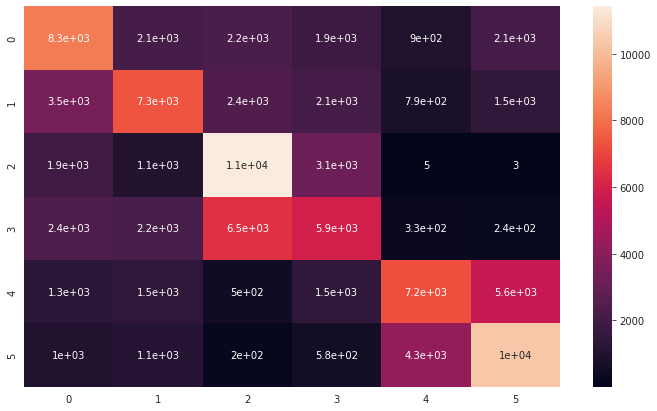

In [34]:
classes = [0,1,2,3,4,5]
cf_matrix = confusion_matrix(y_true, y_pred, normalize=None)
df_cm = pd.DataFrame(cf_matrix, index = [i for i in classes],
                     columns = [i for i in classes])
plt.figure(figsize = (12,7))
sn.heatmap(df_cm, annot=True)
plt.savefig('output.png')